In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/MAIC')

['MAIC2023-20230916T025150Z-002.zip', 'MAIC2023-20230916T025150Z-001.zip']

In [ ]:
!cp -r /content/drive/MyDrive/MAIC /content/

In [ ]:
!pwd

/content


In [ ]:
!unzip /content/MAIC/MAIC2023-20230916T025150Z-001.zip
# !unzip /content/MAIC/MAIC2023-20230916T025150Z-002.zip

Archive:  /content/MAIC/MAIC2023-20230916T025150Z-001.zip
  inflating: MAIC2023/ECG_adult_numpy_train.egg  
  inflating: MAIC2023/submission.csv  
  inflating: MAIC2023/ECG_child_age_train.csv  
  inflating: MAIC2023/ECG_adult_age_train.csv  
Archive:  /content/MAIC/MAIC2023-20230916T025150Z-002.zip
  inflating: MAIC2023/ECG_child_numpy_valid.zip  
  inflating: MAIC2023/ECG_adult_numpy_valid.zip  
  inflating: MAIC2023/ECG_child_numpy_train.zip  


In [ ]:
!mkdir ecg_child
!unzip /content/MAIC2023/ECG_child_numpy_train.zip -d ecg_child

In [ ]:
cd = pd.read_csv('./MAIC2023/ECG_child_age_train.csv')

In [ ]:
cd.head()

,FILENAME,GENDER,AGE
0,ecg_child_0,MALE,1.500000
1,ecg_child_1,MALE,4.833333
2,ecg_child_2,FEMALE,5.583333
3,ecg_child_3,FEMALE,5.083333
4,ecg_child_4,MALE,0.166667


In [ ]:
c0 = np.load('ecg_child/ecg_child_0.npy')
c0.shape

(60000,)

In [ ]:
def ecg_dict(array):
    lead = ['I','II', 'III','V1','V2','V3','V4','V5','V6','aVR','aVL', 'aVF']
    ecg = dict()
    for i in range(len(lead)):
        ecg[lead[i]] = array[5000 * i : 5000 * (i+1)]
    return ecg

In [ ]:
d0 = ecg_dict(c0)
d0.keys()

dict_keys(['I', 'II', 'III', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'aVR', 'aVL', 'aVF'])

In [ ]:
d0['I'] == c0[:5000]

array([ True,  True,  True, ...,  True,  True,  True])

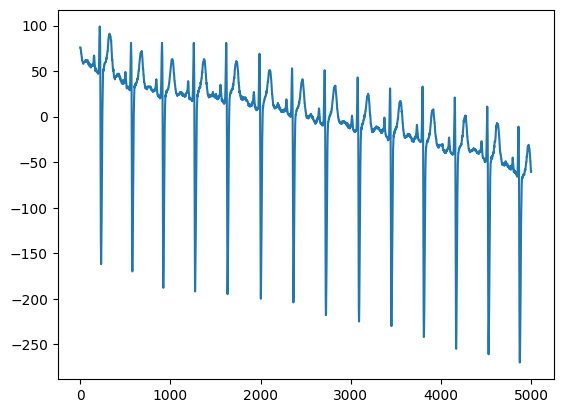

In [ ]:
plt.plot(d0['I'])

In [ ]:
d0['I']

array([ 76.,  76.,  76., ..., -61., -61., -60.])

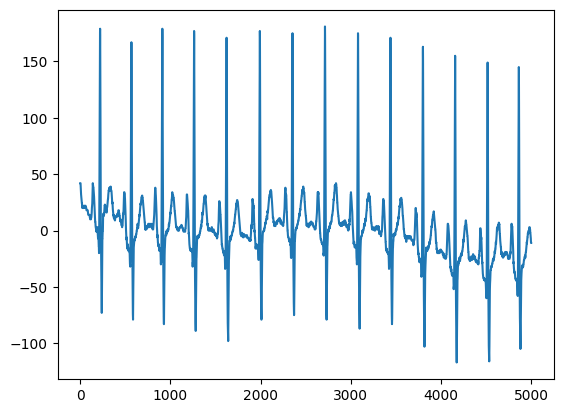

In [ ]:
plt.plot(d0['II'])

아래는 다른 노트북에서 작업하여 폴더와 파일이 다름, 경로 맞춰서 진행할 것

In [ ]:
a0 = np.load('ecg_train/ecg_adult_0.npy')
a1 = np.load('ecg_train/ecg_adult_1.npy')
a2 = np.load('ecg_train/ecg_adult_2.npy')
a3 = np.load('ecg_train/ecg_adult_3.npy')
a4 = np.load('ecg_train/ecg_adult_4.npy')
a5 = np.load('ecg_train/ecg_adult_5.npy')


d0 = ecg_dict(a0)
d1 = ecg_dict(a1)
d2 = ecg_dict(a2)
d3 = ecg_dict(a3)
d4 = ecg_dict(a4)
d5 = ecg_dict(a5)

In [ ]:
plt.figure(figsize =  (10,5))
plt.plot(d0['I'])
plt.plot(d1['I'])
plt.plot(d2['I'])
plt.plot(d3['I'])
plt.plot(d4['I'])
plt.plot(d5['I'])
plt.show()

In [ ]:
pd.read_json('model/config.json')

,epochs,seed,sample_freq,seq_length,scale_multiplier,batch_size,valid_split,test_split,lr,patience,min_lr,lr_factor,net_filter_size,net_seq_lengh,dropout_rate,kernel_size
0,70,2,400,4096,10,32,0.05,0.15,0.001,7,1.000000e-07,0.1,64,4096,0.8,17
1,70,2,400,4096,10,32,0.05,0.15,0.001,7,1.000000e-07,0.1,128,1024,0.8,17
2,70,2,400,4096,10,32,0.05,0.15,0.001,7,1.000000e-07,0.1,196,256,0.8,17
3,70,2,400,4096,10,32,0.05,0.15,0.001,7,1.000000e-07,0.1,256,64,0.8,17
4,70,2,400,4096,10,32,0.05,0.15,0.001,7,1.000000e-07,0.1,320,16,0.8,17


In [ ]:
pd.read_csv('model/history.csv')

,epoch,train_loss,valid_loss,lr,weighted_rmse,weighted_mae,mae,rmse
0,0,405.865669,211.513532,1.000000e-03,14.543505,11.321917,10.901571,14.086357
1,1,308.882294,204.358788,1.000000e-03,14.295411,11.087060,10.668587,13.809050
2,2,290.232602,188.070020,1.000000e-03,13.713862,10.596954,10.323868,13.354768
3,3,276.579642,191.082299,1.000000e-03,13.823252,10.646464,10.629529,13.764438
4,4,269.425104,189.038557,1.000000e-03,13.749129,10.470259,10.400967,13.514791
...,...,...,...,...,...,...,...,...
65,65,178.673294,137.539593,1.000000e-07,11.727728,9.072825,8.510165,11.087860
66,66,179.348105,139.956431,1.000000e-07,11.830318,9.153945,8.509709,11.073794
67,67,179.152492,137.761297,1.000000e-07,11.737176,9.038925,8.599559,11.212509
68,68,179.363524,137.330049,1.000000e-07,11.718790,9.094210,8.607617,11.193157


In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy import stats
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import tensorflow as tf
import tqdm
from scipy import signal
from tensorflow import keras
from keras.utils import plot_model
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
from scipy.io import loadmat
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload
%reload_ext autoreload
sns.set_style("dark")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def attia_network_age(samp_freq,time,num_leads):
    input_layer = keras.layers.Input(shape=(samp_freq*time, num_leads))


    # Temporal analysis block 1
    conv1 = keras.layers.Conv1D(filters=16,kernel_size=7,strides=1,padding='same')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation("relu")(conv1)
    conv1 = keras.layers.MaxPooling1D(pool_size=2)(conv1)

    # Temporal analysis block 2
    conv2 = keras.layers.Conv1D(filters=16,kernel_size=5,strides=1,padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation("relu")(conv2)
    conv2 = keras.layers.MaxPooling1D(pool_size=2)(conv2)

    # Temporal analysis block 3
    conv3 = keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation("relu")(conv3)
    conv3 = keras.layers.MaxPooling1D(pool_size=2)(conv3)

    # Temporal analysis block 4
    conv4 = keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='same')(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.Activation("relu")(conv4)
    conv4 = keras.layers.MaxPooling1D(pool_size=2)(conv4)

    # Temporal analysis block 5
    conv5 = keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding='same')(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.Activation("relu")(conv5)
    conv5 = keras.layers.MaxPooling1D(pool_size=2)(conv5)

    # Temporal analysis block 6
    conv6 = keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same')(conv5)
    conv6 = keras.layers.BatchNormalization()(conv6)
    conv6 = keras.layers.Activation("relu")(conv6)
    conv6 = keras.layers.MaxPooling1D(pool_size=2)(conv6)

    # Temporal analysis block 7
    conv7 = keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same')(conv6)
    conv7 = keras.layers.BatchNormalization()(conv7)
    conv7 = keras.layers.Activation("relu")(conv7)
    conv7 = keras.layers.MaxPooling1D(pool_size=2)(conv7)

    # Temporal analysis block 8
    conv8 = keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same')(conv7)
    conv8 = keras.layers.BatchNormalization()(conv8)
    conv8 = keras.layers.Activation("relu")(conv8)
    conv8 = keras.layers.MaxPooling1D(pool_size=2)(conv8)

    # Spatial analysis block 1
    spatial_block_1 = keras.layers.Conv1D(filters=128,kernel_size=1,strides=1,padding='same')(conv8)
    spatial_block_1 = keras.layers.BatchNormalization()(spatial_block_1)
    spatial_block_1 = keras.layers.Activation("relu")(spatial_block_1)
    spatial_block_1 = keras.layers.MaxPooling1D(pool_size=2)(spatial_block_1)
    spatial_block_1 = tf.keras.layers.Flatten()(spatial_block_1)

    # Fully Connected block 1
    fc_block_1 = keras.layers.Dense(units=128)(spatial_block_1)
    fc_block_1 = keras.layers.BatchNormalization()(fc_block_1)
    fc_block_1 = keras.layers.Activation("relu")(fc_block_1)
    fc_block_1 = keras.layers.Dropout(rate=0.2)(fc_block_1)

    # Fully Connected block 1
    fc_block_2 = keras.layers.Dense(units=64)(fc_block_1)
    fc_block_2 = keras.layers.BatchNormalization()(fc_block_2)
    fc_block_2 = keras.layers.Activation("relu")(fc_block_2)
    fc_block_2 = keras.layers.Dropout(rate=0.2)(fc_block_2)



    #output_layer_1 = keras.layers.Dense(units=1,activation='linear')(last_dense)
    output_layer = keras.layers.Dense(units=1,activation='linear')(fc_block_2)

    model = keras.models.Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

    return model

In [ ]:
def _inception_module(input_tensor, stride=1, activation='linear', use_bottleneck=True, kernel_size=40, bottleneck_size=32, nb_filters=32):

    if use_bottleneck and int(input_tensor.shape[-1]) > 1:
        input_inception = keras.layers.Conv1D(filters=bottleneck_size, kernel_size=1,
                                              padding='same', activation=activation, use_bias=False)(input_tensor)
    else:
        input_inception = input_tensor

    # kernel_size_s = [3, 5, 8, 11, 17]
    kernel_size_s = [kernel_size // (2 ** i) for i in range(3)]

    conv_list = []

    for i in range(len(kernel_size_s)):
        conv_list.append(keras.layers.Conv1D(filters=nb_filters, kernel_size=kernel_size_s[i],
                                              strides=stride, padding='same', activation=activation, use_bias=False)(
            input_inception))

    max_pool_1 = keras.layers.MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

    conv_6 = keras.layers.Conv1D(filters=nb_filters, kernel_size=1,
                                  padding='same', activation=activation, use_bias=False)(max_pool_1)

    conv_list.append(conv_6)

    x = keras.layers.Concatenate(axis=2)(conv_list)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation(activation='relu')(x)
    return x

def _shortcut_layer(input_tensor, out_tensor):
    shortcut_y = keras.layers.Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                                      padding='same', use_bias=False)(input_tensor)
    shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

    x = keras.layers.Add()([shortcut_y, out_tensor])
    x = keras.layers.Activation('relu')(x)
    return x

def build_model(input_shape, nb_classes, depth=50, use_residual=True):
    input_layer = keras.layers.Input(input_shape)

    x = input_layer
    input_res = input_layer

    for d in range(depth):

        x = _inception_module(x)

        if use_residual and d % 3 == 2:
            x = _shortcut_layer(input_res, x)
            input_res = x

    gap_layer = keras.layers.GlobalAveragePooling1D()(x)

    output_layer = keras.layers.Dense(units=nb_classes,activation='linear')(gap_layer)

    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    #model.compile(loss=[macro_double_soft_f1], optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

In [ ]:
samp_freq = 100
time = 10
num_leads = 12
batchsize = 16
epoch = 25

In [ ]:
model = build_model((samp_freq*time,num_leads), 1)

In [ ]:
print("Training model...")
for i in range(len(folds)):
    train_ind = folds[i][0]
    test_ind = folds[i][1]


    #model = attia_network_age(samp_freq,time,num_leads) # velg modell
    model = build_model((samp_freq*time,num_leads), 1)
    model.fit(x=shuffle_batch_generator_age(batch_size=batchsize, gen_x=generate_X_age(ecg_filenames[train_ind]), gen_y=generate_y_age(age[train_ind]),num_leads=num_leads), epochs=epoch,
              steps_per_epoch=(len(train_ind)/batchsize),
              validation_data=shuffle_batch_generator_age(batch_size=batchsize, gen_x=generate_X_age(ecg_filenames[test_ind]), gen_y=generate_y_age(age[test_ind]),num_leads=num_leads), validation_freq=1, validation_steps = (len(test_ind)/batchsize),
              verbose = 1,
              callbacks=[reduce_lr]
              )
    mse_score = []
    mae_score = []
    f1_score = []
    acc_score = []
    pred_age = []
    true_age = []
    for j in tqdm.tqdm(test_ind):
        data, header_data = load_challenge_data(ecg_filenames[j])
        if int(header_data[0].split(" ")[2]) != samp_freq:
            data_new = np.ones([num_leads,int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*samp_freq)])
            for k,l in enumerate(data):
                data_new[k] = signal.resample(l, int((int(header_data[0].split(" ")[3])/int(header_data[0].split(" ")[2]))*samp_freq))
            data = data_new
            data = pad_sequences(data, maxlen=samp_freq*10, truncating='post',padding="post")
        data = np.moveaxis(data, 0, -1)
        #y_true = gender[j]
        y_true = age[j]
        true_age.append(y_true)
        y_hat = model.predict(np.expand_dims(data, axis=0))
        pred_age.append(y_hat)
        mse_score.append(mean_squared_error(np.expand_dims(y_true,axis=0),y_hat.ravel()))
        mae_score.append(mean_absolute_error(np.expand_dims(y_true,axis=0),y_hat.ravel()))
        #acc_score.append(accuracy_score(np.expand_dims(y_true,axis=0),y_hat.ravel()))
        #f1_score.append(f1_sccore(np.expand_dims(y_true,axis=0),y_hat.ravel()))
    mse_score = np.asarray(mse_score).mean()
    mae_score = np.asarray(mae_score).mean()
    #acc_score = np.asarray(acc_score).mean()
    #f1_score = np.asarray(f1_score).mean()
    print("MAE score {}".format(mae_score))
    #print("Accuracy score {}".format(acc_score))
    #print("F1 score {}".format(f1_score))
    print("MSE score {}".format(mse_score))
    break

In [ ]:
! ecg_train

/bin/bash: line 1: ecg_train: command not found


In [ ]:
!unzip /content/drive/MyDrive/MAIC설명회/ecg_adult_train.zip -d ecg_train